In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [2]:
# Load the TSV file, using header=None since there is no header row
df_train = pd.read_csv('PowerCons_TRAIN.tsv', sep='\t', header=None)
df_test = pd.read_csv('PowerCons_TEST.tsv', sep='\t', header=None)

In [3]:
#  Separate labels and data of train 
labels_train = df_train.iloc[:, 0].values        
data_train = df_train.iloc[:, 1:]     
print("train Labels shape:", labels_train.shape)
print("train Data shape: ", data_train.shape)

train Labels shape: (180,)
train Data shape:  (180, 144)


In [4]:
#  Separate labels and data of test 
labels_test = df_test.iloc[:, 0].values        
data_test = df_test.iloc[:, 1:]     
print("test Labels shape:", labels_test.shape)
print("test Data shape: ", data_test.shape)

test Labels shape: (180,)
test Data shape:  (180, 144)


In [5]:
#  Verify there are no missing values
print("\nAny missing values in the train dataset?", data_train.isnull().any().any())
print("\nAny missing values in the test dataset?", data_test.isnull().any().any())


Any missing values in the train dataset? False

Any missing values in the test dataset? False


In [6]:
print(data_train.head())
print(data_test.head())

    1     2     3     4     5     6     7     8     9     10   ...   135  \
0  0.44  0.40  0.36  0.35  0.35  0.38  0.36  0.35  0.35  0.38  ...  0.77   
1  0.14  0.19  0.19  0.16  0.16  0.18  0.17  0.16  0.17  0.17  ...  0.48   
2  0.34  0.34  0.34  0.26  0.18  0.83  1.48  1.36  0.95  0.55  ...  0.84   
3  1.70  1.50  1.30  3.40  5.50  4.15  2.80  2.67  2.53  2.49  ...  1.62   
4  1.78  1.59  1.39  1.45  1.45  1.41  1.40  1.45  1.46  1.40  ...  1.36   

    136   137   138   139   140   141   142   143   144  
0  0.40  0.33  0.29  0.28  0.24  0.22  0.23  0.25  0.25  
1  0.62  0.39  0.17  0.14  0.70  1.25  1.21  1.20  1.24  
2  0.97  1.23  1.49  1.17  0.85  0.83  0.79  0.75  0.73  
3  1.61  1.60  1.59  1.55  1.00  0.55  0.37  0.37  0.36  
4  1.36  1.40  0.81  0.23  0.27  0.29  0.28  0.27  0.27  

[5 rows x 144 columns]
    1     2     3     4     5     6     7     8     9     10   ...   135  \
0  3.66  3.23  2.87  2.50  1.85  1.74  1.63  1.47  1.19  0.91  ...  0.13   
1  0.44  0.33  0.23

Plotting sample idx = 30
Plotting sample idx = 31
Plotting sample idx = 32
Plotting sample idx = 33
Plotting sample idx = 34


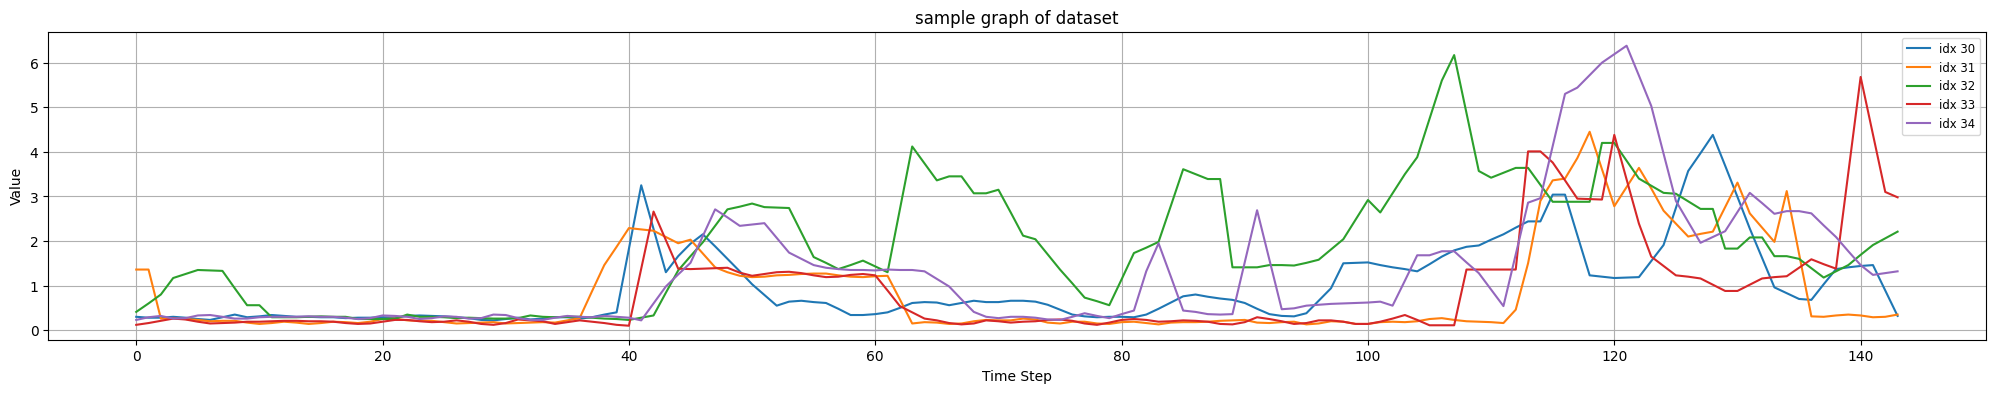

In [7]:
plt.figure(figsize=(25, 4))
count = 0
for i in range(len(labels_train)):
    if labels_train[i] == 2:
        print(f"Plotting sample idx = {i}")
        plt.plot(data_train.iloc[i].values,label=f"idx {i}")
        count += 1
        if count == 5:
            break
plt.title("sample graph of dataset")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend(loc="upper right", fontsize="small")
plt.grid(True)
plt.show()

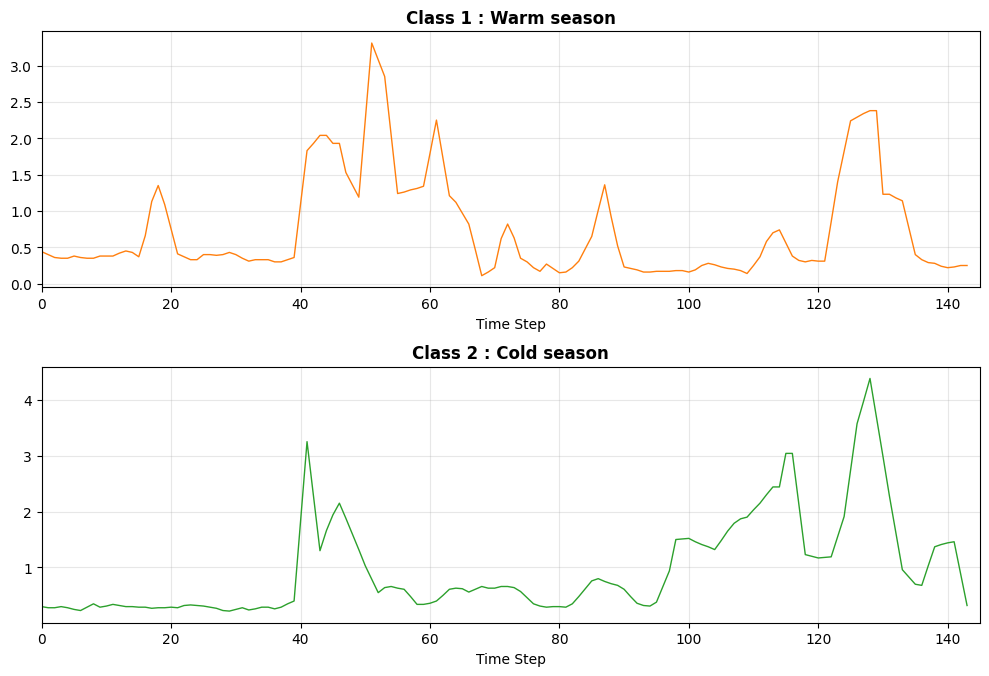

In [9]:
# Map numeric labels to human-readable names
class_names = {
    1: "Warm season",
    2: "Cold season",
}

colors = plt.cm.tab10.colors
ticks = np.arange(0, 145, 20)

fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=False)

for cls, ax in zip(range(3), axes):
    # find the first example of this class
    idxs = np.where(labels_train == cls)[0]
    if len(idxs) == 0:
        ax.set_visible(False)
        continue
    idx = idxs[0]
    series = data_train.iloc[idx].values

    # plot
    ax.plot(series, color=colors[cls], linewidth=1)

    # X-axis ticks and labels on every subplot
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks)
    ax.set_xlim(0, 145)


    # Title centered
    ax.set_title(f"Class {cls} : {class_names[cls]}", fontsize=12, fontweight="bold")
    ax.grid(True, alpha=0.3)

# Add a shared X label underneath all subplots
for ax in axes:
    ax.set_xlabel("Time Step")

plt.tight_layout(h_pad=1.0)
plt.savefig("PowerCons_graph.pdf", bbox_inches='tight')
plt.show()

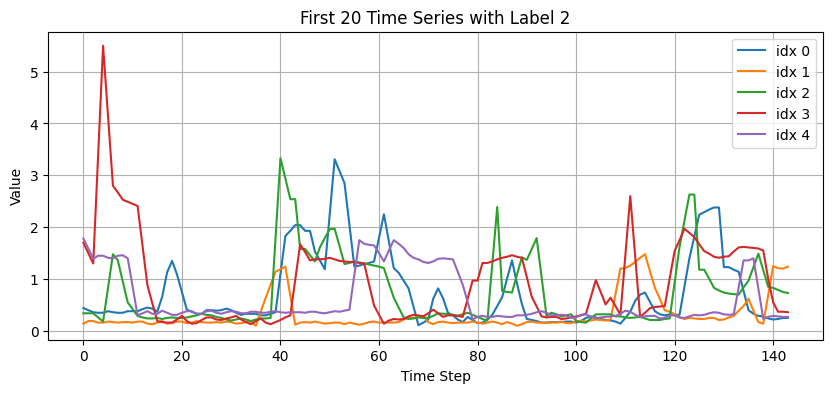

In [10]:
plt.figure(figsize=(10, 4))
count = 0
for i in range(len(labels_train)):
    if labels_train[i] == 1:
        plt.plot(data_train.iloc[i].values, label=f"idx {i}")
        count += 1
        if count == 5:
            break
plt.title("First 20 Time Series with Label 2")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()